In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
import seaborn as sns
import statsmodels.api as sm

/tmp/ipykernel_86628/1396264545.py:7: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr
/tmp/ipykernel_86628/1396264545.py:8: DeprecationWarning: Please import `spearmanr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import spearmanr


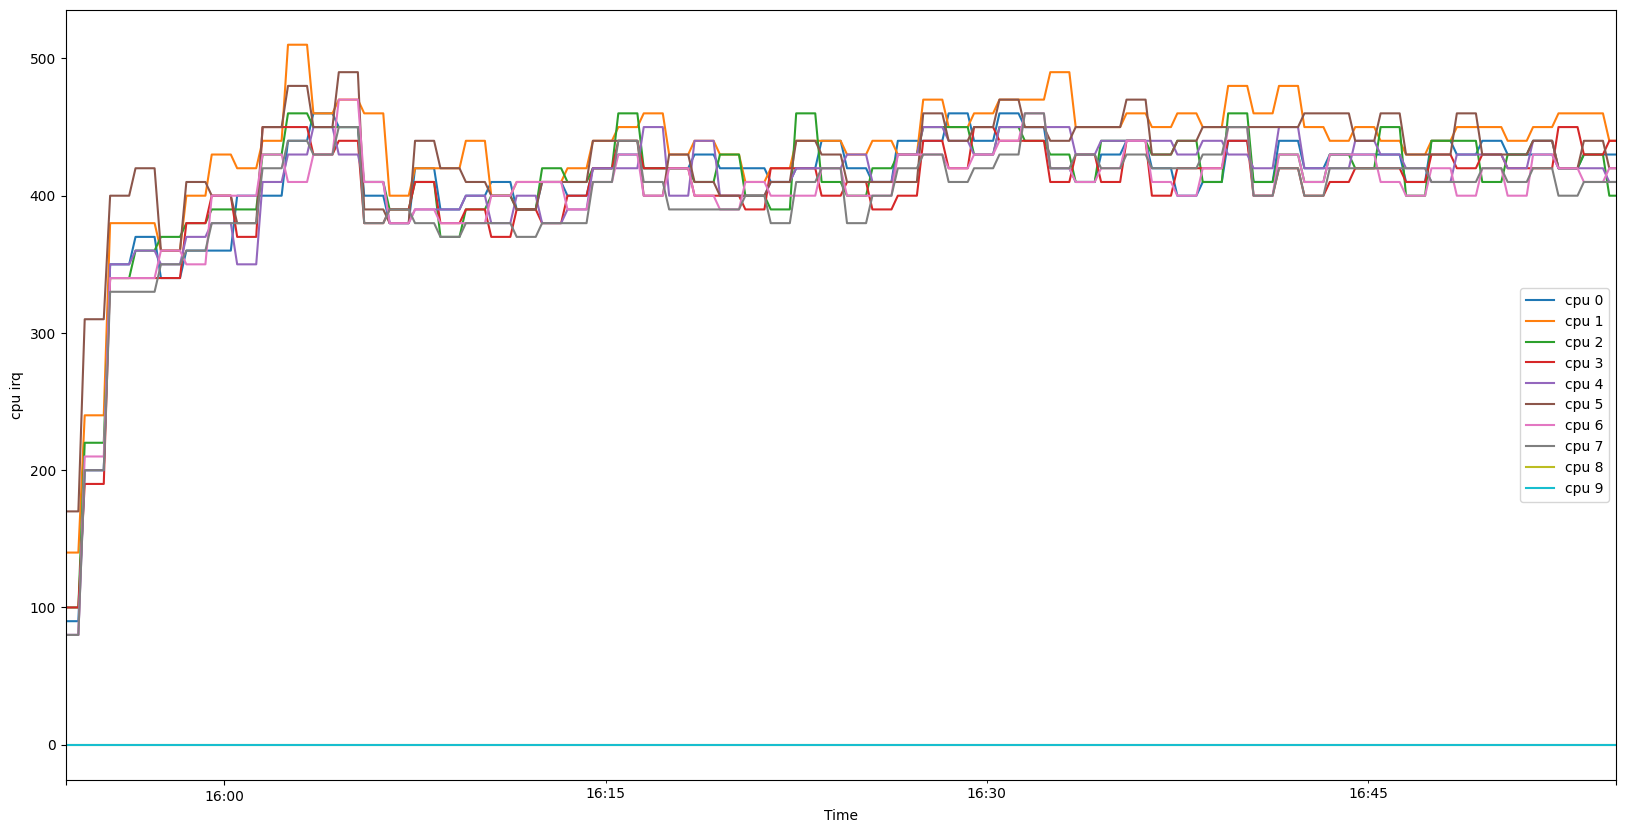

In [3]:
df = pd.read_csv('cpu_IRQ.csv', parse_dates=['Time'], index_col='Time')

df = df.dropna()
ax = df.plot(figsize=(20,10))
ax.set_ylabel('cpu irq')
plt.show()


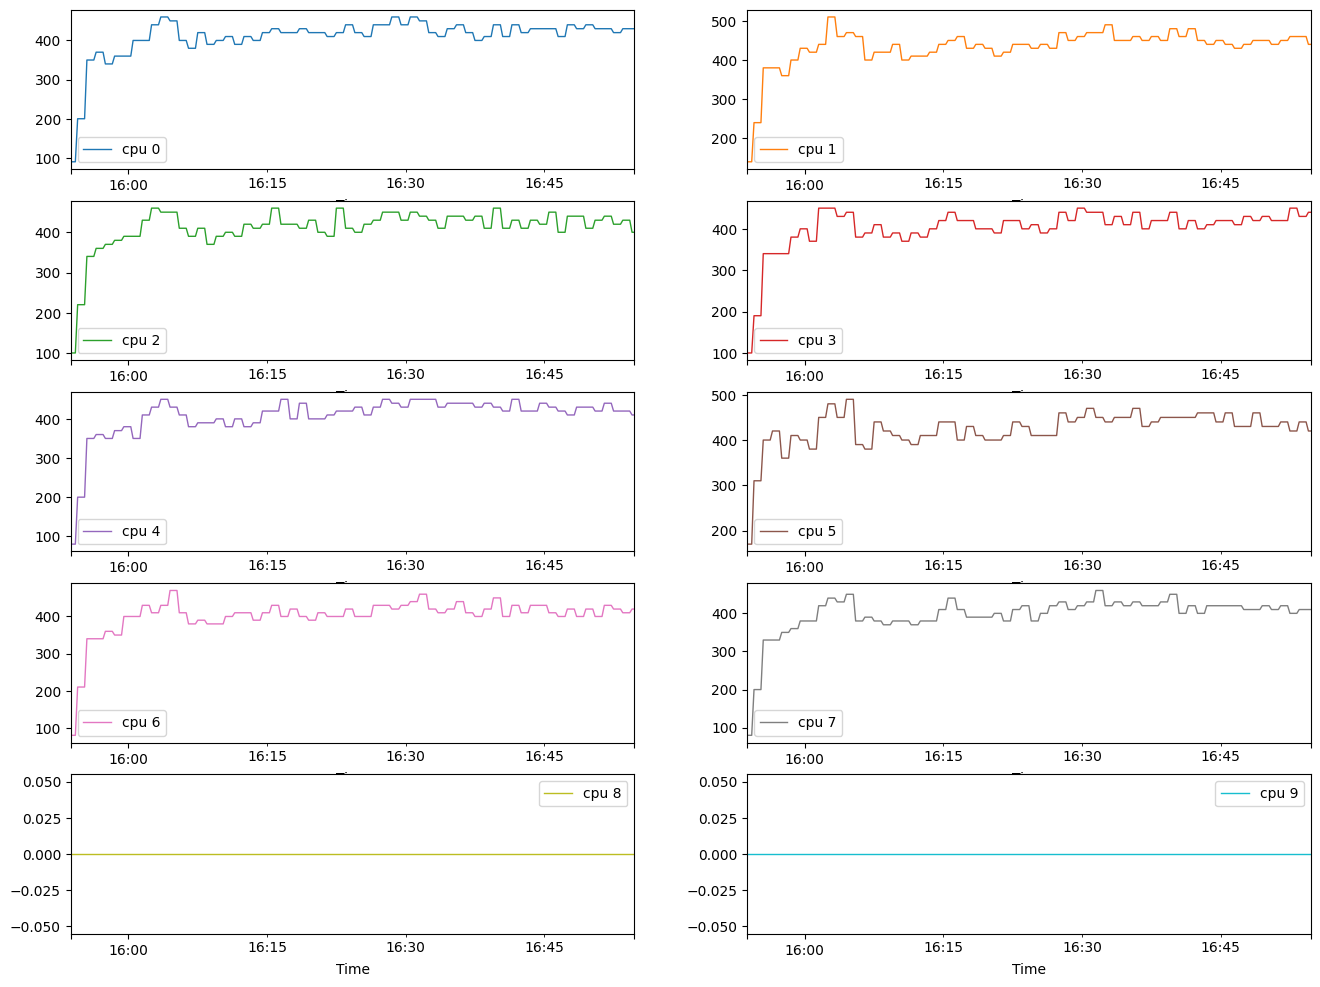

In [4]:
df.plot(subplots=True,
        linewidth=1,
        layout=(5,2),
        figsize=(16,12),
        sharex=False,
        sharey=False)
plt.show()

/tmp/ipykernel_86628/636100573.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current += x[i]
/tmp/ipykernel_86628/636100573.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current -= x[i-order]


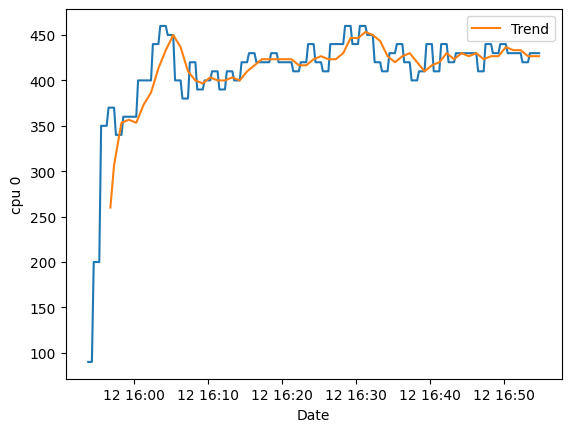

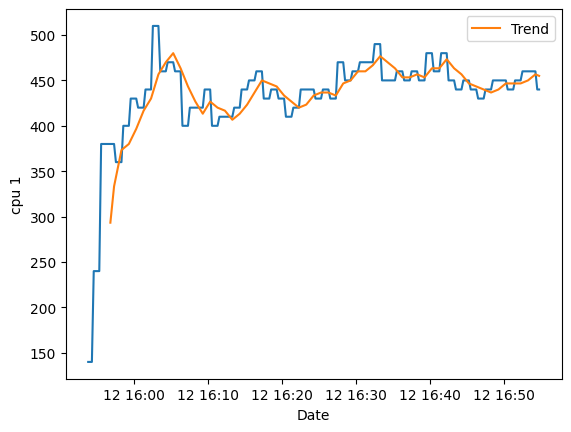

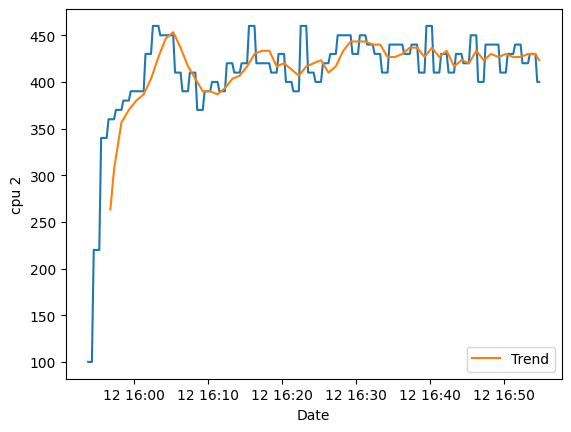

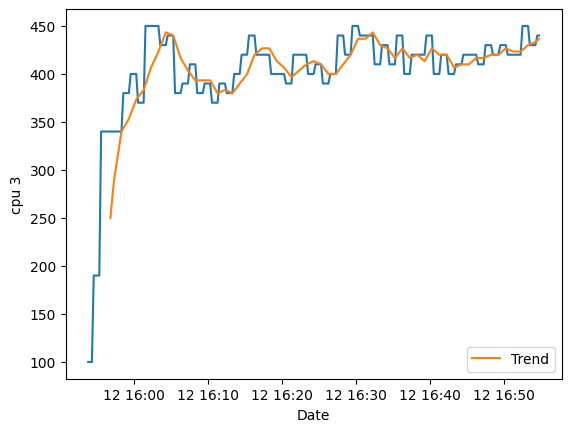

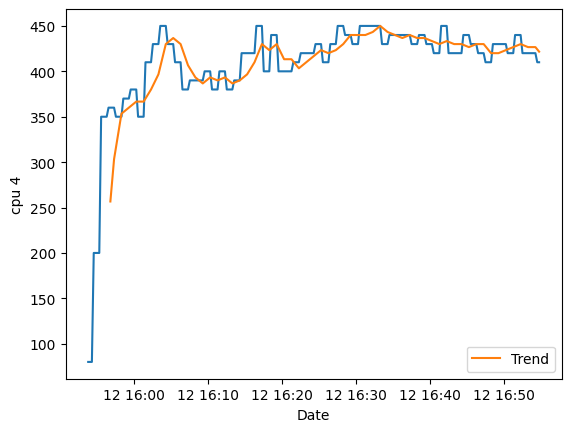

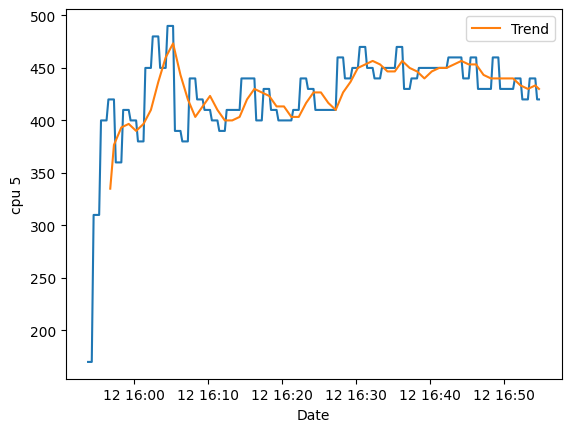

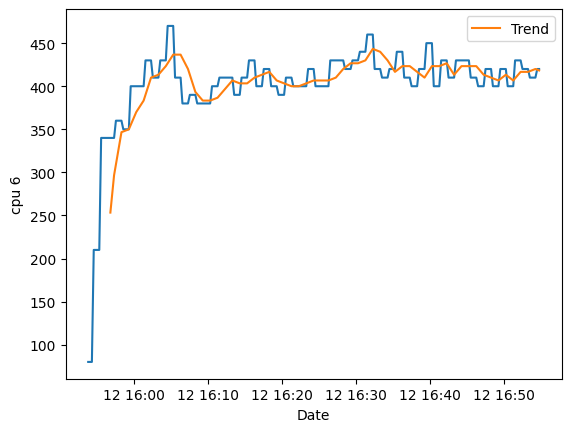

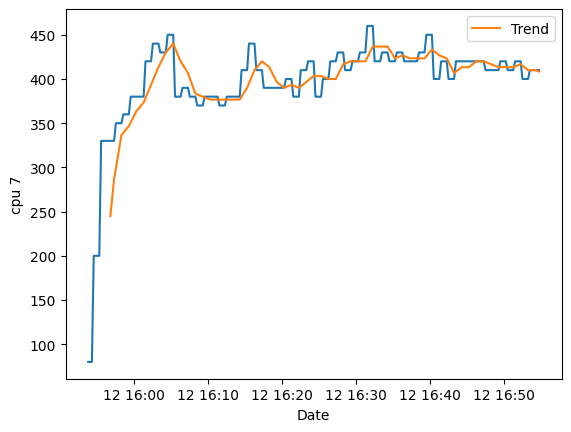

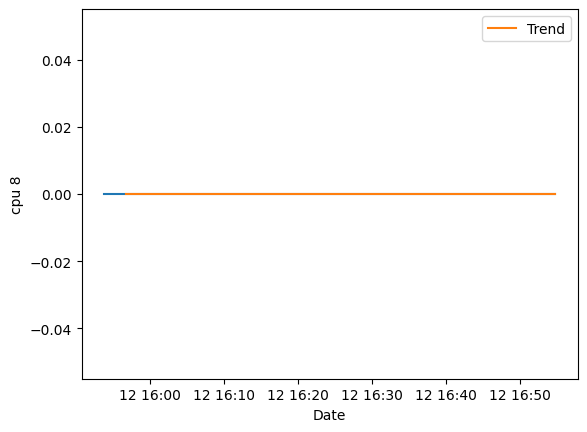

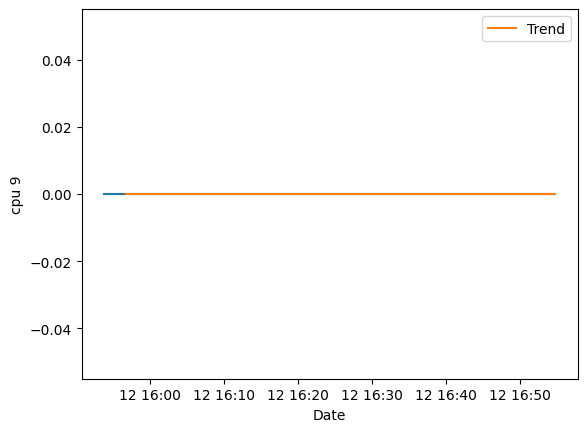

In [5]:
def running_average(x, order):
    current = x[:order].sum()
    running = []

    for i in range(order, x.shape[0]):
        current += x[i]
        current -= x[i-order]
        running.append(current/order)
    
    return np.array(running)

for feature in df.columns:
    trend = running_average(df[feature], 12)
    fig, ax = plt.subplots(1, 1)
    ax.plot(df.index, df[feature])
    ax.set_xlabel('Date')
    ax.set_ylabel(feature)
    ax.plot(df.index[12:], trend, label='Trend')
    ax.legend()

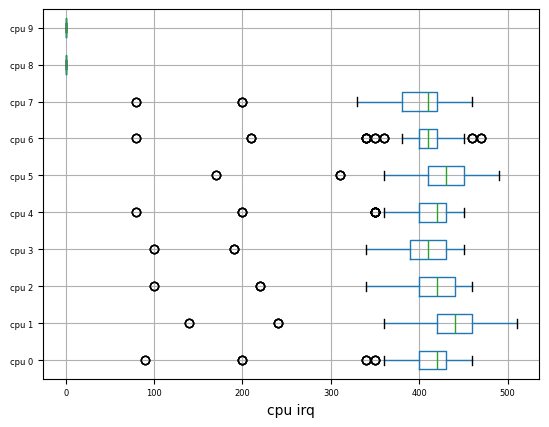

In [6]:
ax = df.boxplot(fontsize=6, vert=False)
ax.set_xlabel('cpu irq')
plt.show()

In [7]:
# Pearson correlation matrix
corr_p = df[df.columns].corr(method='pearson')
print('\nPearson correlation matrix')
print(corr_p)

# Spearman correlation matrix'
corr_s = df[df.columns].corr(method='spearman')
print('\nSpearman correlation matrix')
print(corr_s)


Pearson correlation matrix
          cpu 0     cpu 1     cpu 2     cpu 3     cpu 4     cpu 5     cpu 6  \
cpu 0  1.000000  0.927400  0.950620  0.935172  0.951985  0.873600  0.953243   
cpu 1  0.927400  1.000000  0.934133  0.941143  0.954347  0.888645  0.924578   
cpu 2  0.950620  0.934133  1.000000  0.940691  0.933596  0.883837  0.938944   
cpu 3  0.935172  0.941143  0.940691  1.000000  0.937227  0.884166  0.940653   
cpu 4  0.951985  0.954347  0.933596  0.937227  1.000000  0.877791  0.933862   
cpu 5  0.873600  0.888645  0.883837  0.884166  0.877791  1.000000  0.862028   
cpu 6  0.953243  0.924578  0.938944  0.940653  0.933862  0.862028  1.000000   
cpu 7  0.946781  0.948062  0.957508  0.955028  0.953817  0.896372  0.965436   
cpu 8       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
cpu 9       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

          cpu 7  cpu 8  cpu 9  
cpu 0  0.946781    NaN    NaN  
cpu 1  0.948062    NaN    NaN  
cpu 2 

<Axes: >

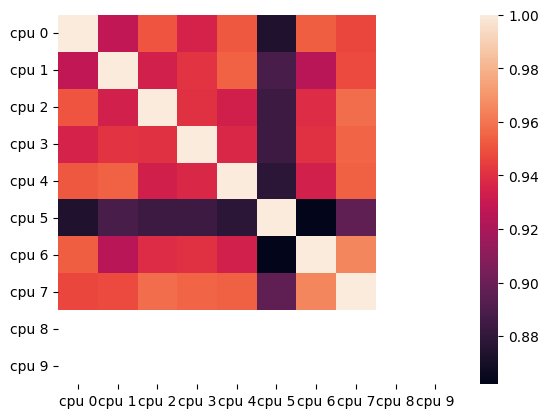

In [8]:
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat)

<Axes: >

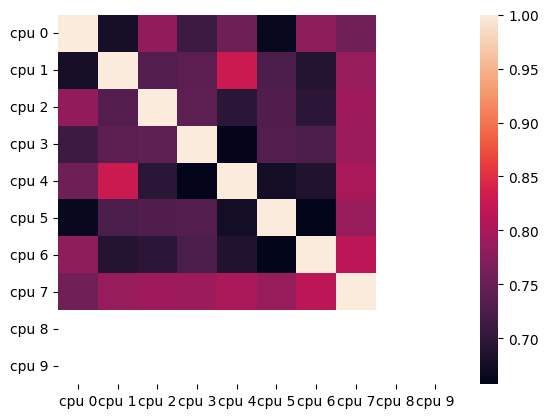

In [9]:
corr_mat_spearman = df.corr(method='spearman')
sns.heatmap(corr_mat_spearman)

In [10]:
dict_decompositions = {}
df.names = df.columns
print(df.names)


Index(['cpu 0', 'cpu 1', 'cpu 2', 'cpu 3', 'cpu 4', 'cpu 5', 'cpu 6', 'cpu 7',
       'cpu 8', 'cpu 9'],
      dtype='object')


/tmp/ipykernel_86628/2198433391.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.names = df.columns


In [11]:
for feature in df.names:
    feature_decomposition = sm.tsa.seasonal_decompose(df[feature], period=43)
    dict_decompositions[feature] = feature_decomposition

dict_trend = {}
dict_seasonal = {}
dict_resid = {}

for feature in df.names:
    dict_trend[feature] = dict_decompositions[feature].trend  #TODo Check the period and where to insert!
    dict_seasonal[feature] = dict_decompositions[feature].seasonal
    dict_resid[feature] = dict_decompositions[feature].resid

trend_df = pd.DataFrame.from_dict(dict_trend)
seasonal_df = pd.DataFrame.from_dict(dict_seasonal)
resid_df = pd.DataFrame.from_dict(dict_resid)

Text(0.5, 1.0, 'seasonal component of cpu irq dataset')

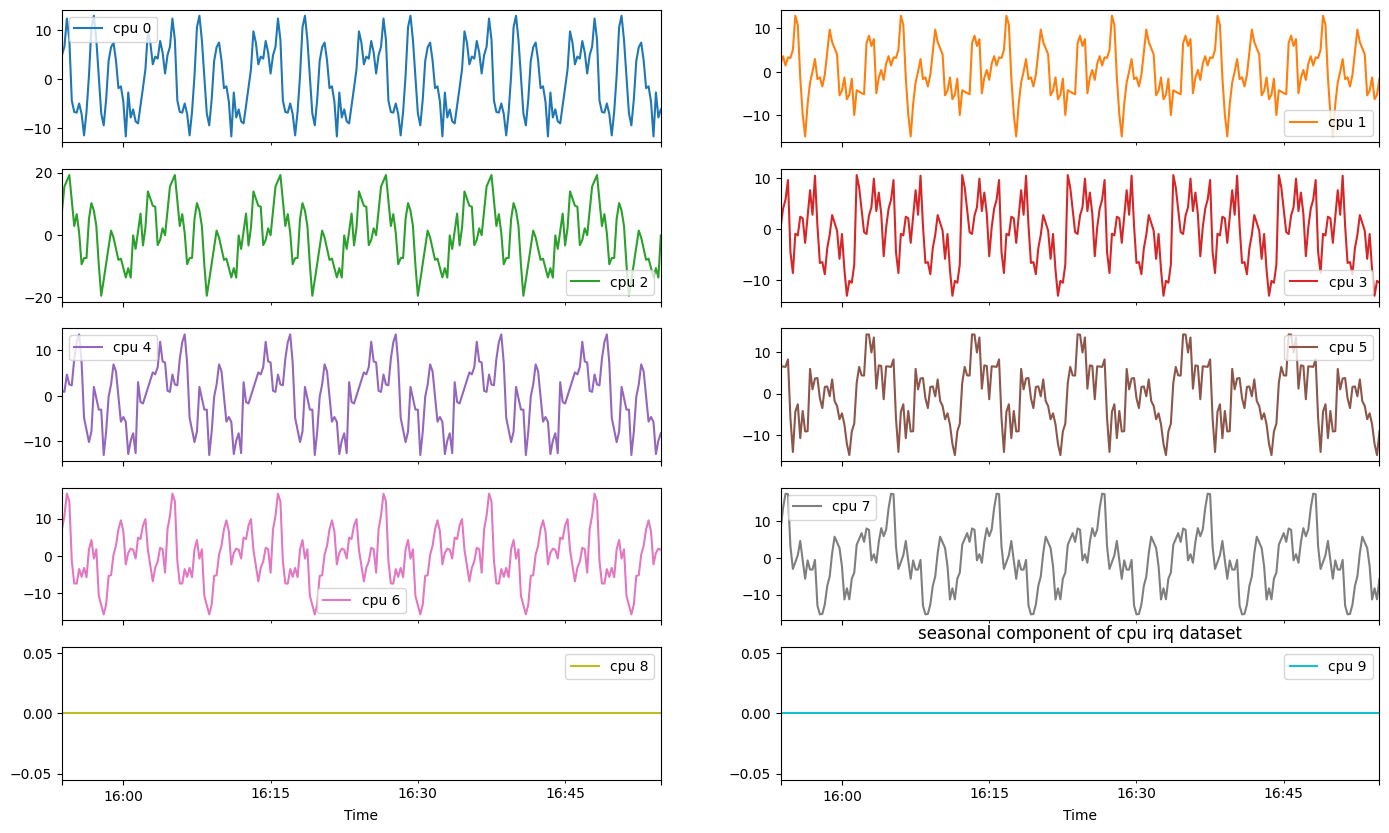

In [12]:
seasonal_df.plot(subplots=True, layout=(5, 2),
          figsize=(17, 10),
          sharex=True,
          sharey=False)
plt.title('seasonal component of cpu irq dataset')

Text(0.5, 1.0, 'trend component of cpu cpu irq dataset')

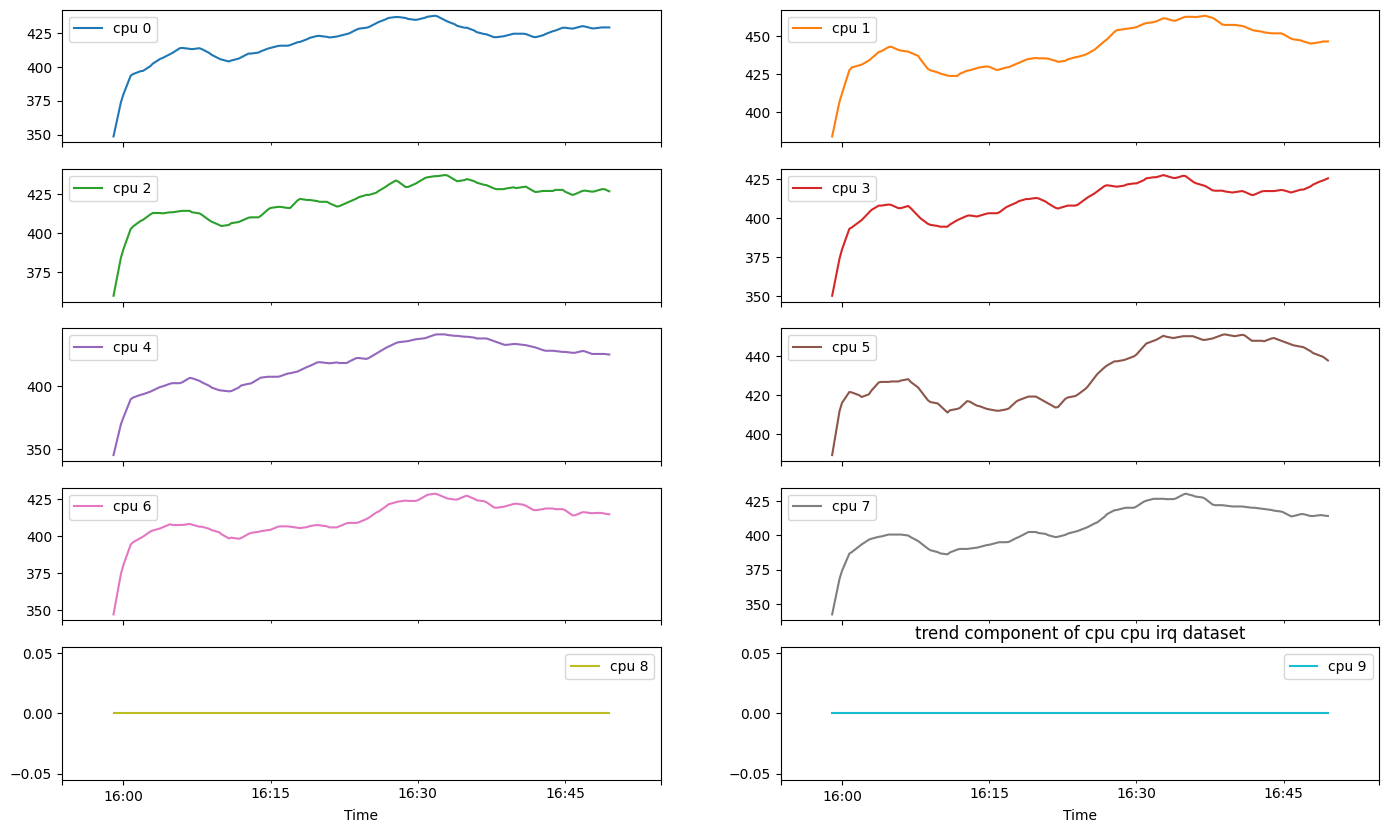

In [13]:
trend_df.plot(
    subplots=True,
    layout=(5,2),
    figsize=(17,10),
    sharex=True,
    sharey=False
)
plt.title('trend component of cpu cpu irq dataset')

Text(0.5, 1.0, 'residual component of cpu irq msec dataset')

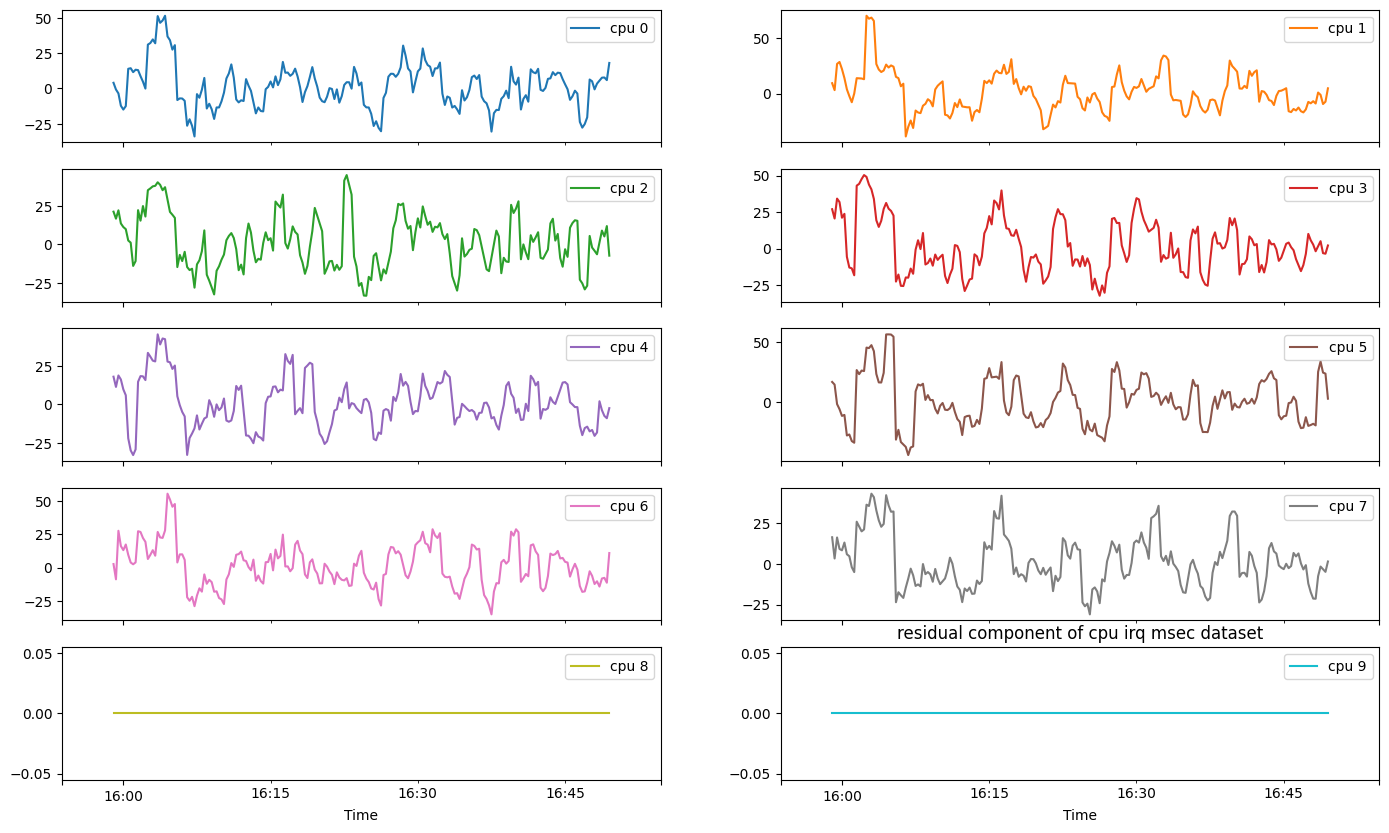

In [14]:
resid_df.plot(
    subplots=True,
    layout=(5,2),
    figsize=(17,10),
    sharex=True,
    sharey=False
)
plt.title('residual component of cpu irq msec dataset')

Text(0.5, 1.0, 'residual of the feature in the dataset')

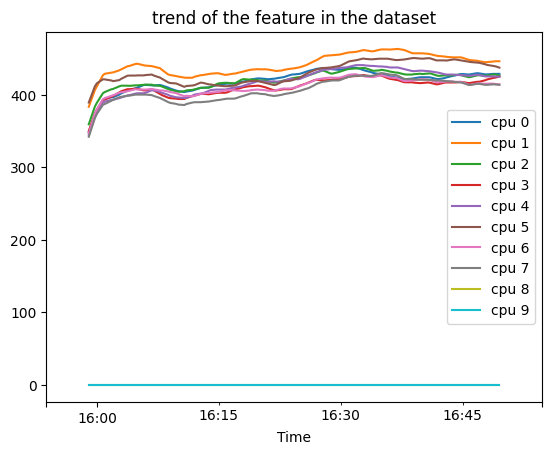

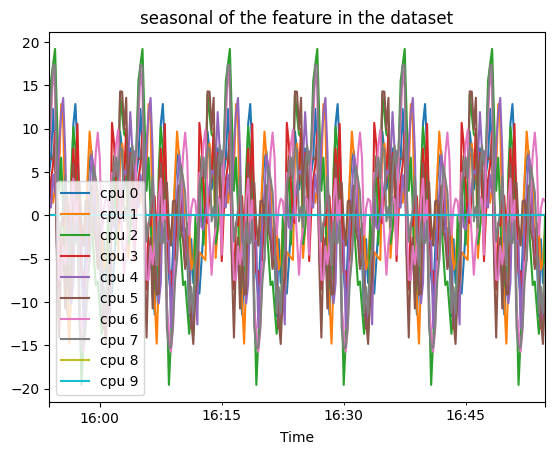

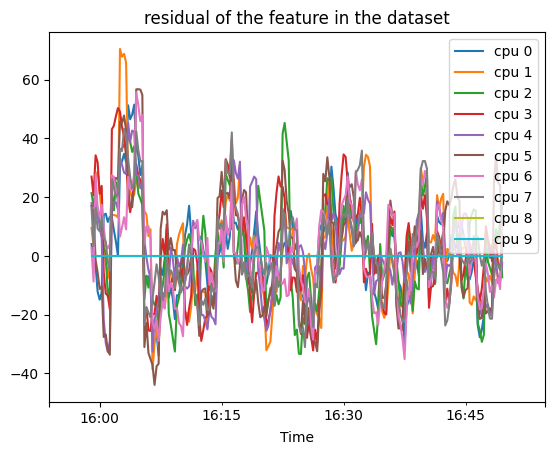

In [15]:
trend_df.plot()
plt.title('trend of the feature in the dataset')

seasonal_df.plot()
plt.title('seasonal of the feature in the dataset')

resid_df.plot()
plt.title('residual of the feature in the dataset')

[None, None, None, None, None, None, None, None]

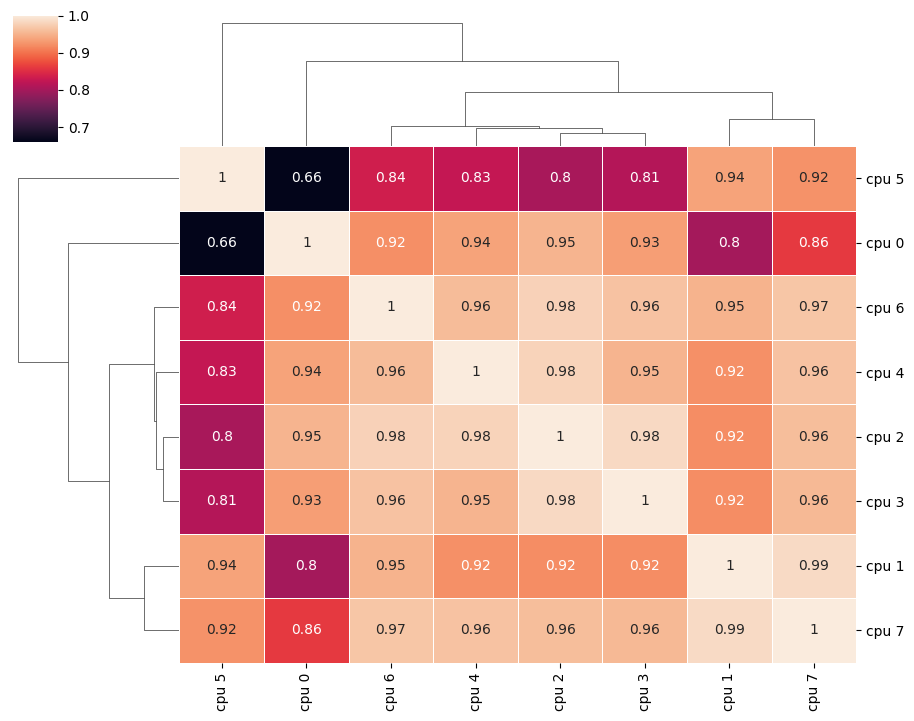

In [17]:
colonne_da_eliminare = ['cpu 8', 'cpu 9']
trend_df_clean = trend_df.drop(columns=colonne_da_eliminare)

trend_corr = trend_df_clean.dropna().corr(method='pearson')

# Customize the clustermap of the seasonality_corr
fig = sns.clustermap(trend_corr, annot=True, linewidth=0.5,figsize=(9,7))

plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)

[None, None, None, None, None, None, None, None]

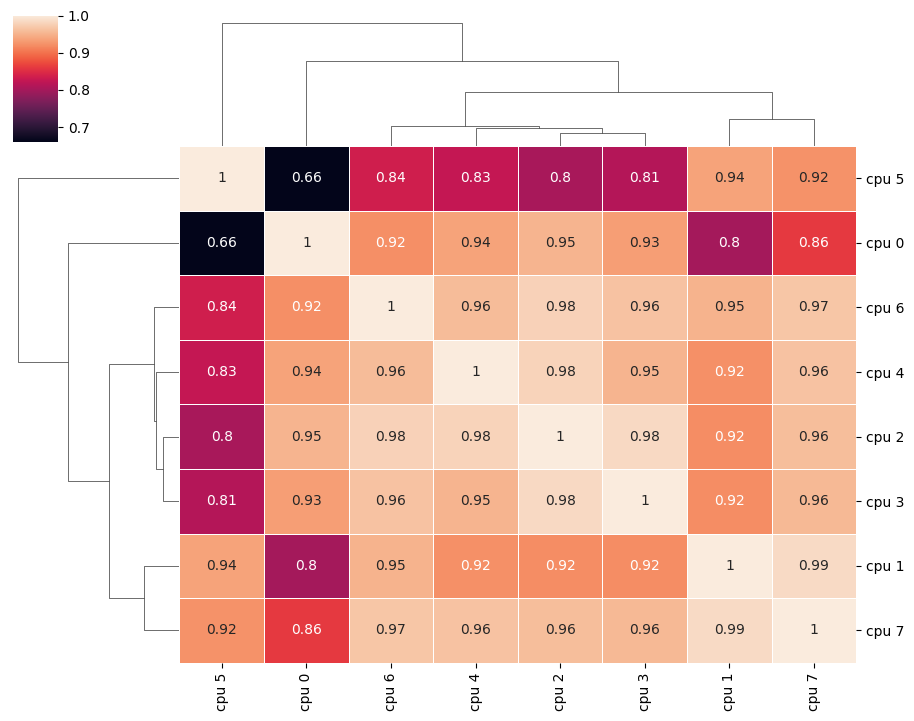

In [18]:
trend_corr_spearman = trend_df.corr(method='spearman')

fig = sns.clustermap(trend_corr, annot=True, linewidth=0.4,figsize=(9,7))

plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)